#TAG SMART EMAILS

GENSIM AND LDA

https://radimrehurek.com/gensim/apiref.html

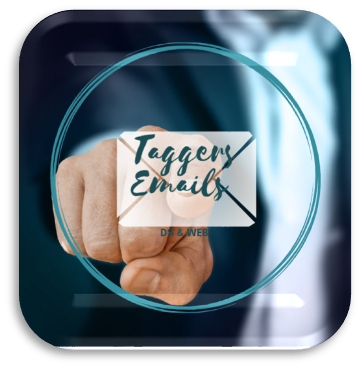

In [ ]:
from PIL import Image
# load the image
logo = Image.open('tagsemailslogo.png')
logo

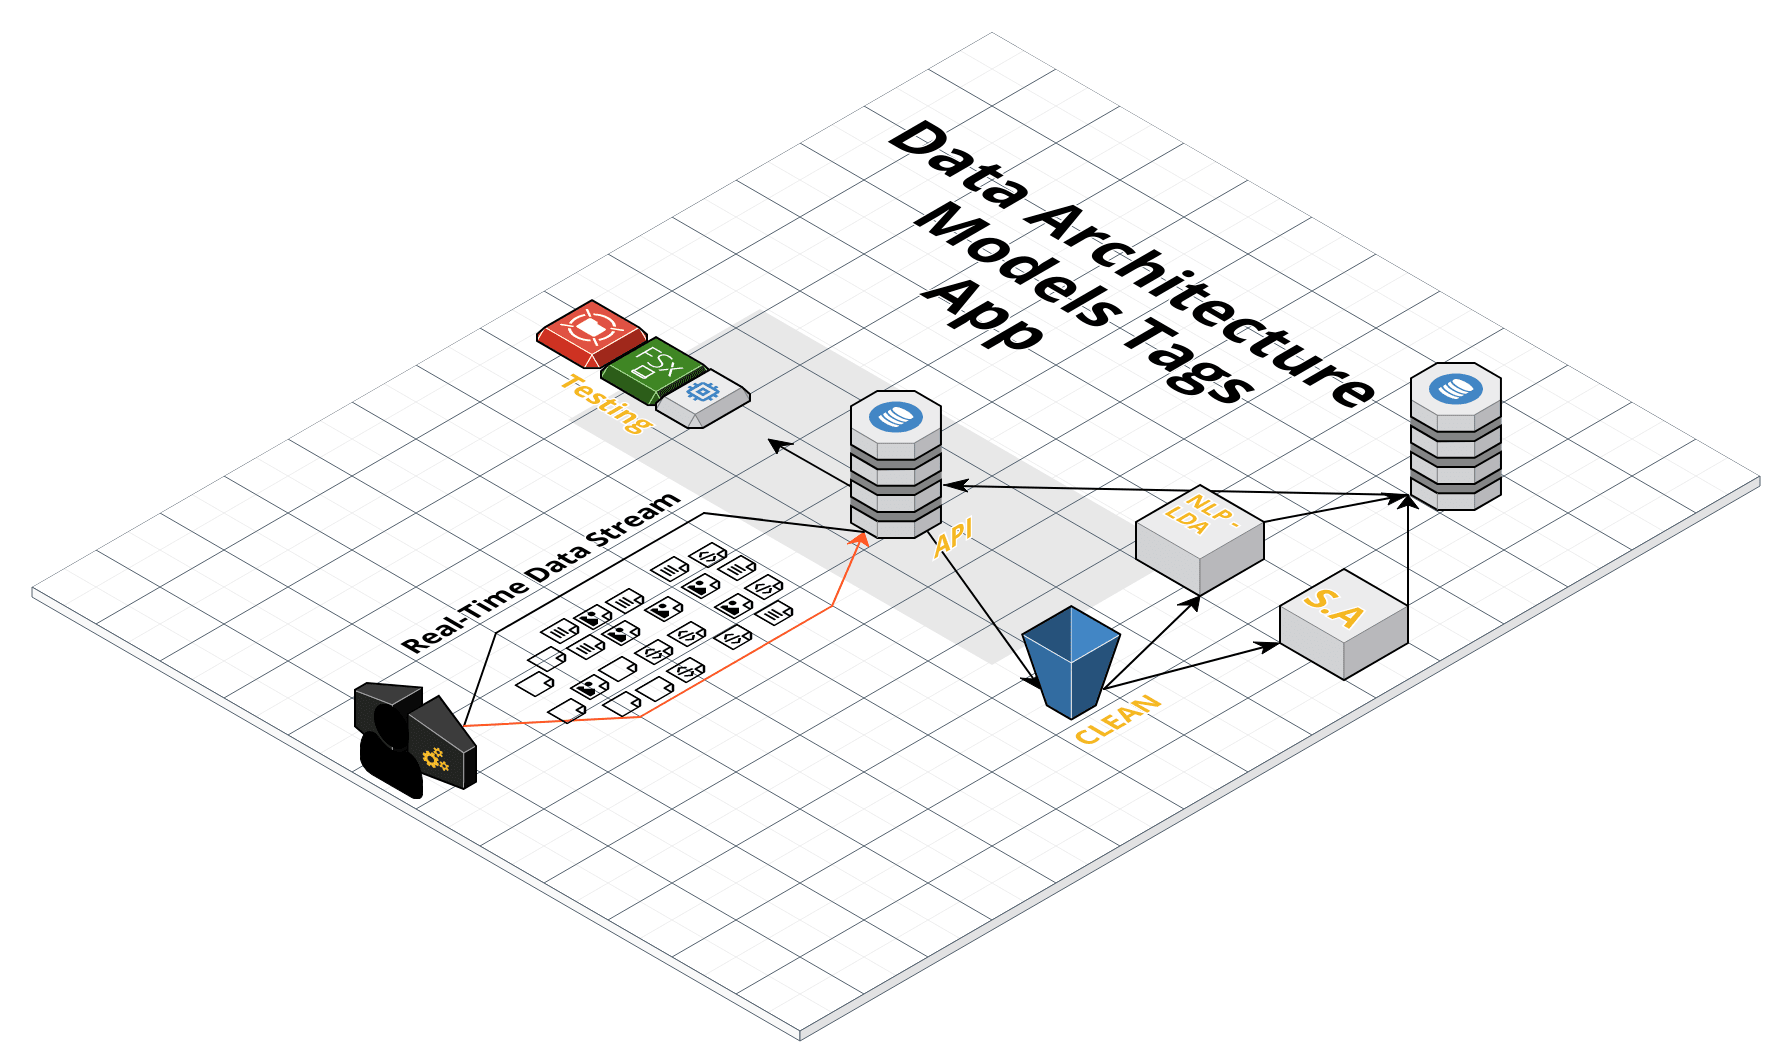

In [ ]:
from PIL import Image
# load the image
Arquitecture = Image.open('Streaming Data Architecture.png')
Arquitecture

In [18]:
#Library
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import spacy
import pandas as pd

In [19]:
%pwd

'/content'

In [20]:
import requests
url = 'https://raw.githubusercontent.com/Moly-malibu/Tag-Smart-Emails/master/Enronemails.csv?token=AN2RW2DKPHIVK3OYPOWHUPK65LAQU'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

24004915

In [21]:
#EMAILS FROM ENRON COMPANY SAMPLING
df = pd.read_csv("email.csv").drop(['Unnamed: 0'], axis=1)
print(df.shape) 
df.head(7)

(10000, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...


In [22]:
#TO GET EMAIL BODY
[s.strip() for s in df['message'][1].splitlines()]

['Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>',
 'Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: john.lavorato@enron.com',
 'Subject: Re:',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>',
 'X-cc:',
 'X-bcc:',
 "X-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen (Non-Privileged).pst',
 '',
 'Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.',
 '',
 'As far as the business meetings, I think it would be more productive to try and stimulate discussions across

In [23]:
' '.join([s.strip() for s in df['message'][1].splitlines()][15:])

" Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.  As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  My suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time."

In [24]:
#CLEAN EMAIL BODY
def cleanemail(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])

df['email_body'] = df['message'].apply(cleanemail)

df.head()

,file,message,email_body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes th...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the sal..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.


In [25]:
#CLEAN HTML
import re
import html

def cleanup_html(raw_html):
    clean_html = re.sub(r'<.*?>', '', raw_html)
    clean_html_http = re.sub(r'http\S+([\.]{3})?', '', clean_html)
    clean_txt = html.unescape(clean_html)
    return clean_txt
df['email_body'] = df['email_body'].apply(cleanup_html)

In [26]:
#CLEAN DATA
#remove whitespace
df['email_body'] = df['email_body'].str.strip().str.lower()

#Start with date
df['email_body'].str.match('\d?\d/\d?\d/\d{4}').all()

#Replace all non-overlapping matches
df['email_body'] = df['email_body'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [27]:
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
#Getting Stopwords
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# define additional stop words
import nltk
import spacy

nlp = spacy.load('en_core_web_sm')

stop = stopwords.words('english')
sno = SnowballStemmer('english')
print (stop)
print('***************************************')
print(sno.stem('tasty'))

STOP_WORDS = list(STOP_WORDS)
print('\n'.join([word for word in STOP_WORDS[:10]]))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
tokens = []
for doc in nlp.pipe(df['email_body'], batch_size=500):

    doc_tokens = []

    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())

    tokens.append(doc_tokens)

df['smart_tags'] = tokens

In [30]:
df['smart_tags'].head()

0                                           [forecast]
1    [travel, business, meeting, take, fun, trip, e...
2                              [test, successful, way]
3    [randy, send, schedule, salary, level, schedul...
4                                [let, shoot, tuesday]
Name: smart_tags, dtype: object

In [31]:
df

,file,message,email_body,smart_tags
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,here is our forecast,[forecast]
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,traveling to have a business meeting takes the...,"[travel, business, meeting, take, fun, trip, e..."
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful way to go,"[test, successful, way]"
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,randy can you send me a schedule of the salary...,"[randy, send, schedule, salary, level, schedul..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,lets shoot for tuesday at,"[let, shoot, tuesday]"
...,...,...,...,...
9995,bass-e/_sent_mail/1047.,Message-ID: <21376194.1075854731510.JavaMail.e...,shes pretty sexy huh are we getting together t...,"[s, pretty, sexy, huh, get, talk, europe, tono..."
9996,bass-e/_sent_mail/1048.,Message-ID: <2401643.1075854731531.JavaMail.ev...,i copied your idea and it screwed up your name,"[copy, idea, screw]"
9997,bass-e/_sent_mail/1049.,Message-ID: <32002412.1075854731553.JavaMail.e...,forwarded by eric basshouect on am troy kluss...,"[ , forward, eric, basshouect, troy, klussmann..."
9998,bass-e/_sent_mail/105.,Message-ID: <21429983.1075854709202.JavaMail.e...,did you buy any enron in the s,"[buy, enron, s]"


In [33]:
id2word = Dictionary(df['smart_tags'])
print(len(id2word))

45828


In [34]:
id2word.filter_extremes(no_below=5, no_above=.98)
print(len(id2word))

14979


In [35]:
#https://radimrehurek.com/gensim/corpora/dictionary.html

corpus = [id2word.doc2bow(d) for d in df['smart_tags']]

In [36]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=12
                  )

In [37]:
model = LdaMulticore(corpus=corpus, num_topics=10, id2word=id2word, workers=12, passes=5)

In [38]:
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in model.print_topics()]

In [39]:
topics = [' '.join(t[0:5]) for t in words]

In [40]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n")

------ Topic 0 ------
email message pm subject send
------ Topic 1 ------
pm subject cc enron john
------ Topic 2 ------
subject cc phillip gas forward
------ Topic 3 ------
gas price john subject cc
------ Topic 4 ------
john subject not enron think
------ Topic 5 ------
john subject send message pm
------ Topic 6 ------
enron pm meeting subject john
------ Topic 7 ------
enron say company power energy
------ Topic 8 ------
enron john subject send phillip
------ Topic 9 ------
image market iso email click


In [41]:
!pip install pyLDAvis
import pyLDAvis

     |████████████████████████████████| 1.6MB 9.2MB/s 
     |████████████████████████████████| 552kB 51.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=1ff0a5e681e87bc85b1ae90b7e9de03bb7f883e450e2de3e8a4a21b43d472a58
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=0e1fa6c5009cedaf16cfdfe727511c9a3a9cb76dd672b53fb3ef44404df21ab8
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [42]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.134091 -0.047886       1        1  27.267960
9      0.080771  0.039554       2        1  11.271274
6     -0.033417  0.051902       3        1  10.606008
4      0.020988 -0.054247       4        1   8.904907
5     -0.176974  0.014201       5        1   8.530929
0      0.001062  0.095626       6        1   7.982399
8      0.017817 -0.006014       7        1   7.147780
1     -0.013945  0.028040       8        1   7.082044
2      0.055141 -0.009636       9        1   6.682116
3     -0.085534 -0.111540      10        1   4.524581, topic_info=         Term         Freq        Total Category  logprob  loglift
2682    image  3871.000000  3871.000000  Default  30.0000  30.0000
173        pm  8159.000000  8159.000000  Default  29.0000  29.0000
77       john  7429.000000  7429.000000  Default  28.0000  28.0000
193   subject  7539.000000  7539.000000  Default  27.0000  27.0000
1411  message  4375.000000  4375.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
87      thank   131.981323  3399.768555  Topic10  -6.0106  -0.1532
173        pm   146.282349  8159.467773  Topic10  -5.9077  -0.9258
348    market   138.358795  5434.249512  Topic10  -5.9634  -0.5750
204      year   127.847336  3644.770752  Topic10  -6.0424  -0.2546
138   forward   115.480881  3150.302002  Topic10  -6.1442  -0.2105

[951 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
90         1  0.027343           
90         2  0.070067           
90         3  0.152952           
90         4  0.037597           
90         5  0.090575           
...      ...       ...        ...
12693      4  0.024041  zinfandel
12693      5  0.024041  zinfandel
12693      7  0.072123  zinfandel
12693      8  0.048082  zinfandel
12693     10  0.649103  zinfandel

[4998 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 7, 5, 6, 1, 9, 2, 3, 4])

In [43]:
#'corpus'

distro = [lda[d] for d in corpus]

num_topics = 20

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [44]:
#Correlated
topics = pd.DataFrame.from_records(new_distro)
topics.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.533333,0,0,0,0,0
1,0.000000,0.000000,0.000000,0.102725,0.000000,0.000000,0.000000,0.000000,0.882831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
2,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.766666,0.016667,0.016667,0.016667,0.016667,0,0,0,0,0
3,0.000000,0.000000,0.637557,0.308276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
4,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.766666,0.016667,0.016667,0,0,0,0,0


In [45]:
df['email_body'] = topics.idxmax(axis=1)

#Topic  
df['email_body'].describe()

count    10000.000000
mean         7.249000
std          4.349539
min          0.000000
25%          3.000000
50%          8.000000
75%         12.000000
max         14.000000
Name: email_body, dtype: float64

In [46]:
df['email_body'].value_counts()

12    2353
1     1149
3     1031
8      762
10     723
9      651
6      631
5      533
2      488
13     354
0      350
7      311
14     281
4      218
11     165
Name: email_body, dtype: int64

In [47]:
df.to_csv('Topics_LDA.csv', index=False)

Json and CSV

In [ ]:
def save_data_frame_as_csv(df=None, file=None):
    """
    Save a Pandas DataFrame to CSV format.
    """
    try:
        if not file.endswith('.csv'):
            file += '.csv'
        df.to_csv(file, index=False)
        print(f'DataFrame saved as: {file}')
    except Exception as e:
        print("DataFrame couldn't be saved: ", sys.exc_info()[0])
        raise

In [ ]:
save_data_frame_as_csv(df, './merged_data.csv')

In [ ]:
def save_data_frame_as_json(df=None, file=None, orient='records'):
  """
  Save a Pandas DataFrame to Json format.
  """
  try:
    if not file.endswith('.json'):
      file += '.json'
    df.to_json(file, orient=orient)
    print(f'Dataframe saved as: {file}')
  except Exception as e:
    print("Dataframe couldn't be saved: ", sys.exc_info()[0])
    raise

In [ ]:
save_data_frame_as_json(df, '.merged_data.json', orient='records')